In [391]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [392]:
df = pd.read_csv(f'dataset/pokemon_preprocessed.csv')

In [393]:
df

,name,weight_kg,height_m,attack,defense,sp_attack,sp_defense,type1
0,Bulbasaur,6.9,0.7,49,49,65,65,grass
1,Ivysaur,13.0,1.0,62,63,80,80,grass
2,Venusaur,100.0,2.0,100,123,122,120,grass
3,Charmander,8.5,0.6,52,43,60,50,fire
4,Charmeleon,19.0,1.1,64,58,80,65,fire
...,...,...,...,...,...,...,...,...
775,Celesteela,999.9,9.2,101,103,107,101,steel
776,Kartana,0.1,0.3,181,131,59,31,grass
777,Guzzlord,888.0,5.5,101,53,97,53,dark
778,Necrozma,230.0,2.4,107,101,127,89,psychic


In [394]:
def rename(name):
    if name in ['electric', 'fairy', 'fighting', 'psychic', 'ghost', 'ground', 'ice', 'rock', 'dragon', 'dark', 'steel', 'flying']:
        if np.random.rand()> 2/3 :
            return 'Unknown1'
        elif np.random.rand()> 1/2:
            return 'Unknown2'
        else : 
            return 'Unknown3'
    else :return name

(array([127., 186., 130.,  38.,  46.,  79.,  41.,  50.,  56.,  27.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

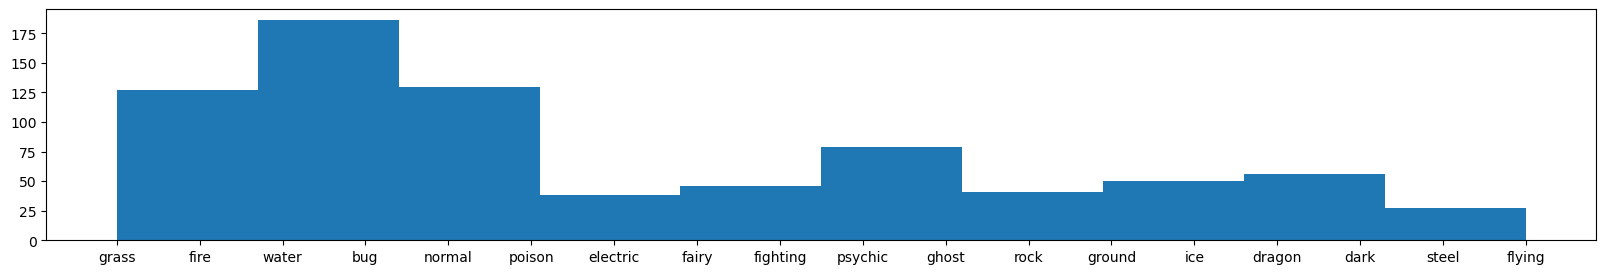

In [395]:
plt.figure(figsize=(20,3))
plt.hist(df['type1'])

['Unknown2', 'water', 'Unknown1', 'Unknown3', 'normal', 'grass', 'bug', 'fire', 'poison']
[119, 114, 110, 108, 100, 77, 72, 50, 30]


<BarContainer object of 9 artists>

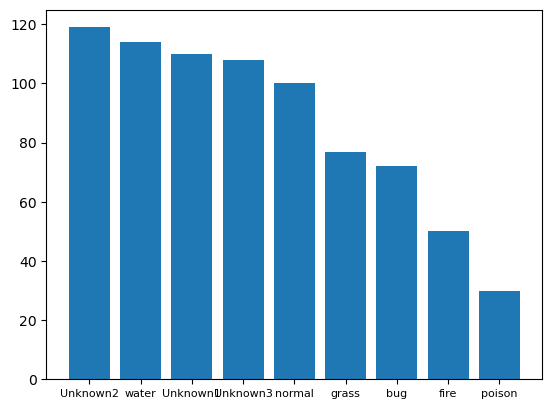

In [396]:

df['type1'] = df['type1'].apply(rename)
names = []
counts = []
for key in df['type1'].value_counts().keys():
    names.append(key)
    counts.append(df['type1'].value_counts()[key])
    pass
print(names)
print(counts)
index = np.arange(len(counts))
plt.xticks(index, names, fontsize=7)
plt.bar(index, counts)

In [397]:
['Unknown2']

['Unknown2']

In [398]:
df['weight_kg']

0        6.9
1       13.0
2      100.0
3        8.5
4       19.0
       ...  
775    999.9
776      0.1
777    888.0
778    230.0
779     80.5
Name: weight_kg, Length: 780, dtype: float64

<Axes: >

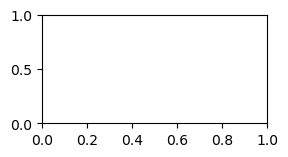

In [399]:
plt.subplot(3,2,1)

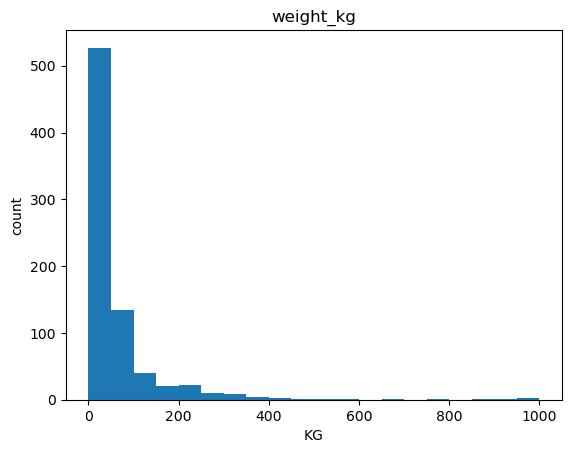

In [400]:
plt.hist(df['weight_kg'], bins = 20)
plt.title('weight_kg')
plt.xlabel('KG')
plt.ylabel('count')
plt.savefig('weight_kg.png')

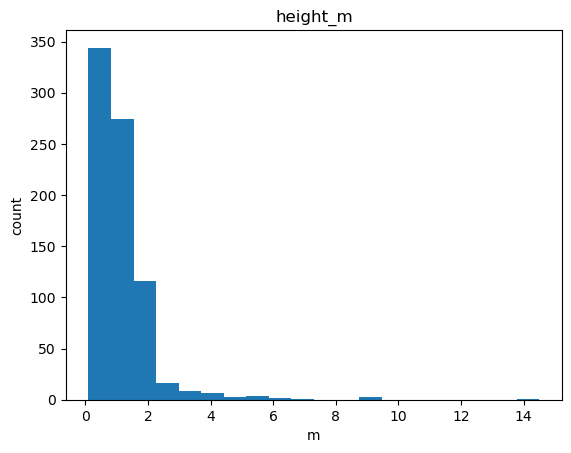

In [401]:
plt.hist(df['height_m'], bins = 20)
plt.title('height_m')
plt.xlabel('m')
plt.ylabel('count')
plt.savefig('height_m.png')


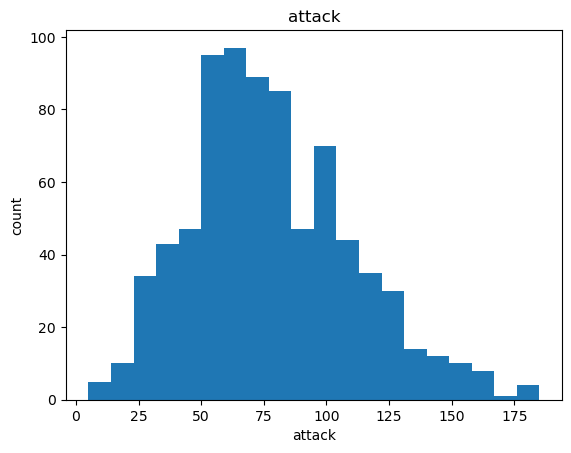

In [402]:
plt.hist(df['attack'], bins = 20)
plt.title('attack')
plt.xlabel('attack')
plt.ylabel('count')
plt.savefig('attack.png')

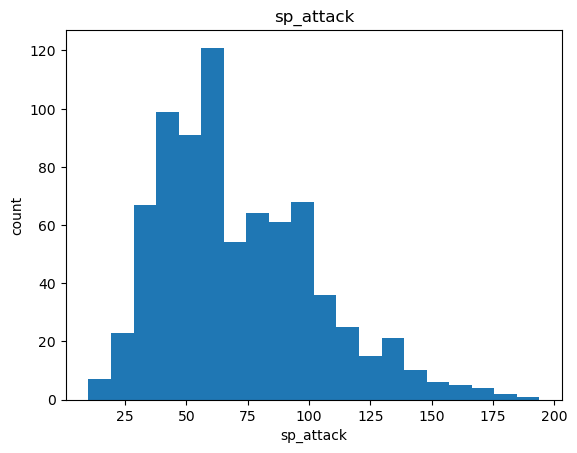

In [403]:
plt.hist(df['sp_attack'], bins = 20)
plt.title('sp_attack')
plt.xlabel('sp_attack')
plt.ylabel('count')
plt.savefig('sp_attack.png')

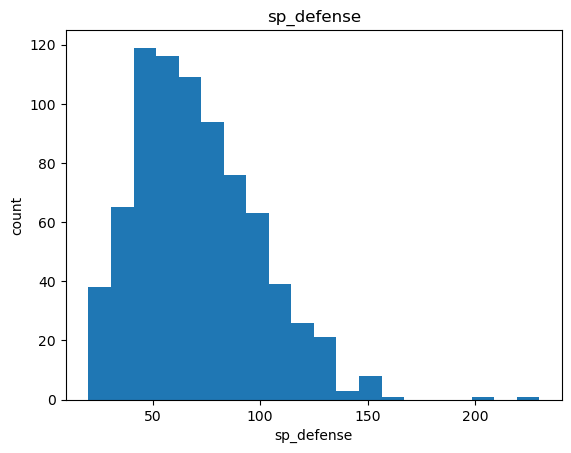

In [404]:
plt.hist(df['sp_defense'], bins = 20)
plt.title('sp_defense')
plt.xlabel('sp_defense')
plt.ylabel('count')
plt.savefig('sp_defense.png')

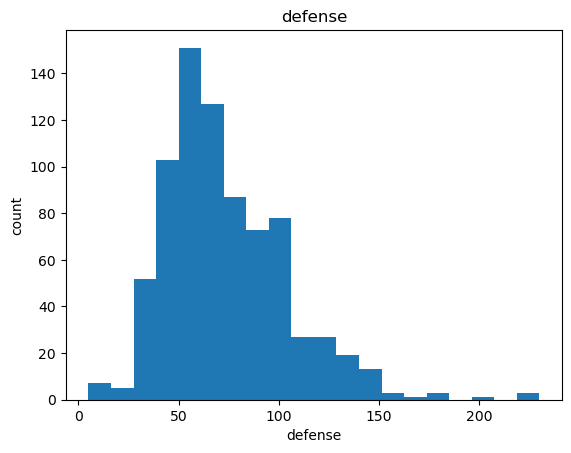

In [405]:
plt.hist(df['defense'], bins = 20)
plt.title('defense')
plt.xlabel('defense')
plt.ylabel('count')
plt.savefig('defense.png')

In [406]:

for column in df.columns:
    if column in ['name', 'type1']:
        continue
    print(column)
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*1.5
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    print(outlier_idx)
    df.drop(outlier_idx, axis=0, inplace=True)

weight_kg
Index([ 47,  78, 111, 112, 124, 130, 189, 207, 211, 224, 225, 226, 228, 229,
       230, 231, 278, 287, 302, 304, 318, 319, 331, 343, 346, 356, 357, 358,
       359, 360, 363, 364, 365, 370, 392, 418, 431, 443, 445, 454, 457, 464,
       465, 466, 467, 468, 474, 481, 507, 526, 539, 595, 596, 604, 616, 619,
       620, 621, 624, 625, 627, 678, 680, 687, 694, 697, 698, 699, 701, 720,
       729, 749, 754, 758, 759, 768, 769, 772, 775, 777, 778],
      dtype='int64')
height_m
Index([21, 129, 317, 478, 770, 774], dtype='int64')
attack
Index([108, 195, 238, 270, 335, 390, 426, 456, 700, 776], dtype='int64')
defense
Index([65, 74, 186, 193, 194, 208, 286, 305, 544, 661, 684, 727, 747], dtype='int64')
sp_attack
Index([5, 53, 77, 131, 162, 263, 362, 639], dtype='int64')
sp_defense
Index([223, 361, 458, 652, 725, 731, 771], dtype='int64')


In [407]:
df.columns

Index(['name', 'weight_kg', 'height_m', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'type1'],
      dtype='object')

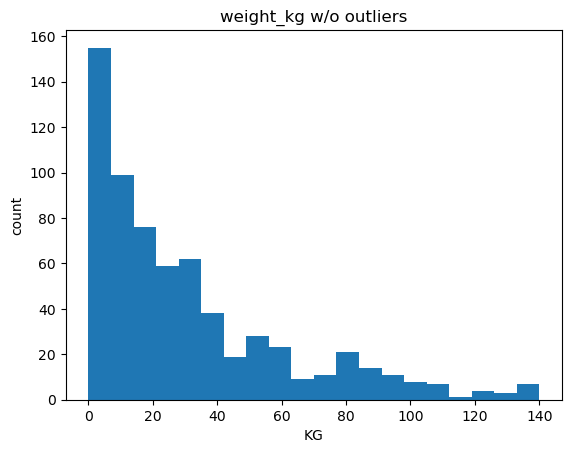

In [408]:
plt.hist(df['weight_kg'], bins = 20)
plt.title('weight_kg w/o outliers')
plt.xlabel('KG')
plt.ylabel('count')
plt.savefig('weight_kg_without_outliers.png')

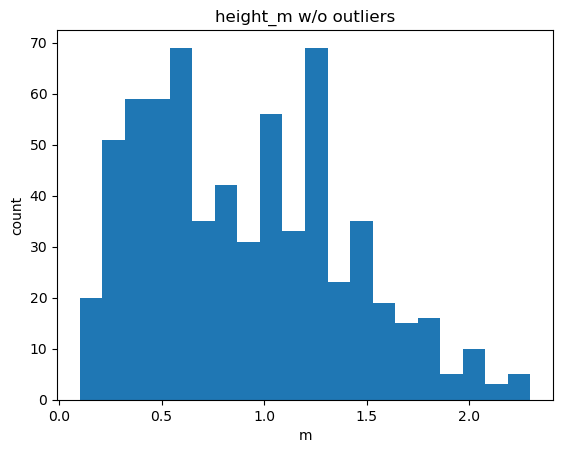

In [409]:
plt.hist(df['height_m'], bins = 20)
plt.title('height_m w/o outliers')
plt.xlabel('m')
plt.ylabel('count')
plt.savefig('height_m_without_outliers.png')

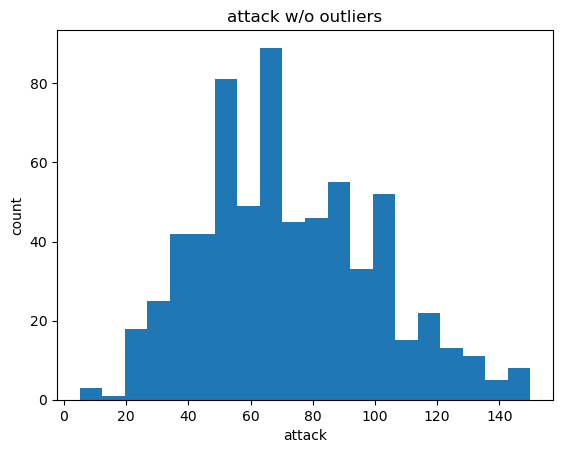

In [410]:
plt.hist(df['attack'], bins = 20)
plt.title('attack w/o outliers')
plt.xlabel('attack')
plt.ylabel('count')
plt.savefig('attack_without_outliers.png')

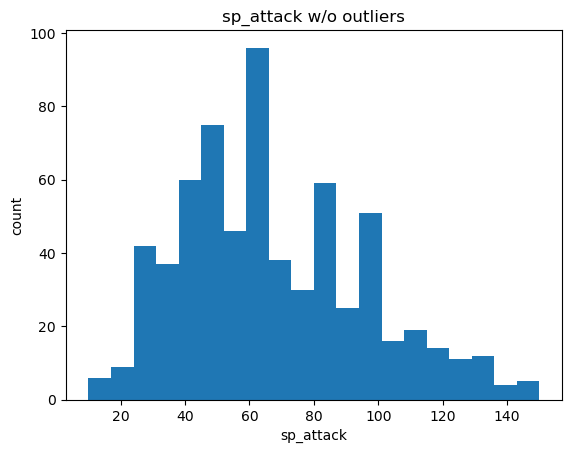

In [411]:
plt.hist(df['sp_attack'], bins = 20)
plt.title('sp_attack w/o outliers')
plt.xlabel('sp_attack')
plt.ylabel('count')
plt.savefig('sp_attack_without_outliers.png')

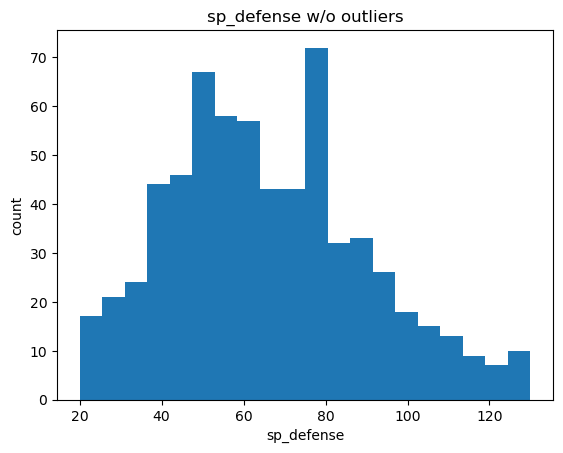

In [412]:
plt.hist(df['sp_defense'], bins = 20)
plt.title('sp_defense w/o outliers')
plt.xlabel('sp_defense')
plt.ylabel('count')
plt.savefig('sp_defense_without_outliers.png')

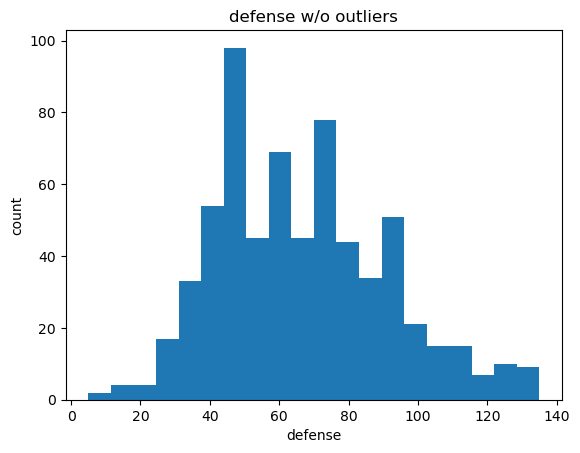

In [413]:
plt.hist(df['defense'], bins = 20)
plt.title('defense w/o outliers')
plt.xlabel('defense')
plt.ylabel('count')
plt.savefig('defense_without_outliers.png')

In [414]:
df.to_csv('dataset/pokemon_preprocessed_without_outliers.csv', index=False)

In [415]:
PTYPE_CATEGORY = {0: 'bug',
                1: 'dark',
                2: 'dragon',
                3: 'electric',
                4: 'fairy',
                5: 'fighting',
                6: 'fire',
                7: 'flying',
                8: 'ghost',
                9: 'grass',
                10: 'ground',
                11: 'ice',
                12: 'normal',
                13: 'poison',
                14: 'psychic',
                15: 'rock',
                16: 'steel',
                17: 'water'}

In [416]:
inverse_dict = {}

for key in PTYPE_CATEGORY.keys():
    inverse_dict[PTYPE_CATEGORY[key]] = key

In [417]:
inverse_dict

{'bug': 0,
 'dark': 1,
 'dragon': 2,
 'electric': 3,
 'fairy': 4,
 'fighting': 5,
 'fire': 6,
 'flying': 7,
 'ghost': 8,
 'grass': 9,
 'ground': 10,
 'ice': 11,
 'normal': 12,
 'poison': 13,
 'psychic': 14,
 'rock': 15,
 'steel': 16,
 'water': 17}